In [95]:
#Importing useful packages

import uproot
import ROOT
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import vector
vector.register_awkward()
%jsroot on

#ATLAS plotting style

ROOT.gROOT.LoadMacro("/eos/user/h/hrussell/Bphys_Data/AtlasStyle/AtlasStyle.C")
ROOT.gROOT.LoadMacro("/eos/user/h/hrussell/Bphys_Data/AtlasStyle/AtlasLabels.C")
ROOT.SetAtlasStyle()
def myText( x, y,text, color=ROOT.kBlack,size=None):
  # //Double_t tsize=0.05;
    l = ROOT.TLatex()
    #others.append(l)
    l.SetNDC();
    l.SetTextColor(color);
    if size:
        l.SetTextSize(size)
    l.DrawLatex(x,y,text);
ROOT.gStyle.SetErrorX(0.5)

#ATLAS legend style

leg = ROOT.TLegend(0.7,0.75,0.9,0.88)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.AddEntry(h_eey,"Z#gamma MC","lp")
leg.AddEntry(h_data,"data","lp")

#ATLAS label style

ROOT.ATLASLabel(0.18,0.88,"Simultation Internal, "+rn,ROOT.kBlack)
myText(0.18,0.81,"mc20_13TeV")

In [96]:
#Reading uproot fnnile

file = uproot.open("/eos/user/h/hrussell/Bphys_Data/mc20.300590.Bd_Kstar_Kpi_e4e4.test1.root")

file2 = uproot.open("/eos/user/h/hrussell/Bphys_Data/synced_files/valid1.300592.Bd_Kstar_Kpi_Jpsi_e4e4.r13670.beek_v8.root")

#Accessing the items in the file

file.keys()

#Accessing the type of items in the file

file.classnames()

{'trig;2': 'TTree', 'trig;1': 'TTree'}

In [97]:
#Accessing the content of the tree "trig"

tree = file['trig']

tree2 = file2['trig']

#Trees are tables of data

tree.keys()

['L1_EM3',
 'L1_EM7',
 'L1_EM12',
 'L1_EM8VH',
 'L1_EM10VH',
 'L1_EM15',
 'L1_EM15VH',
 'L1_EM15VHI',
 'L1_EM18VHI',
 'L1_EM20VH',
 'L1_EM20VHI',
 'L1_EM22VH',
 'L1_EM22VHI',
 'L1_EM24VHI',
 'L1_eEM3',
 'L1_eEM5',
 'L1_eEM7',
 'L1_eEM8L',
 'L1_eEM10L',
 'L1_eEM12',
 'L1_eEM15',
 'L1_eEM15L',
 'L1_eEM15M',
 'L1_eEM18M',
 'L1_eEM20L',
 'L1_eEM20VM',
 'L1_eEM22',
 'L1_eEM22L',
 'L1_eEM22M',
 'L1_eEM22T',
 'L1_eEM24M',
 'L1_MU3V',
 'L1_MU5VF',
 'L1_MU8F',
 'L1_MU8VF',
 'L1_MU14FCH',
 'L1_MU14FCHR',
 'L1_MU3VF',
 'L1_MU8FC',
 'L1_MU8VFC',
 'L1_MU15VFCH',
 'L1_MU10BOM',
 'L1_MU4BOM',
 'L1_MU12BOM',
 'L1_MU10BO',
 'L1_2MU3V',
 'L1_2MU5VF',
 'L1_2MU8F',
 'L1_MU8VF_2MU5VF',
 'L1_MU5VF_2MU3V',
 'L1_3MU3V',
 'L1_3MU5VF',
 'L1_MU5VF_3MU3V',
 'L1_4MU3V',
 'L1_2MU5VF_3MU3V',
 'L1_2MU8VF',
 'L1_MU8F_2MU5VF',
 'L1_2MU14FCH_OVERLAY',
 'L1_2EM3',
 'L1_2EM7',
 'L1_2EM15',
 'L1_2EM15VH',
 'L1_2EM15VHI',
 'L1_2EM20VH',
 'L1_EM20VH_3EM10VH',
 'L1_2EM8VH_MU8F',
 'L1_EM15VH_MU8F',
 'L1_EM7_MU8F',
 'L1_2eEM15L

In [98]:
#Using arrays to get the actual data and assigning it to "branches"

branches = tree.arrays()

branches2 = tree2.arrays()

#Branches are the columns of the table

branches

<Array [{L1_EM3: 1, L1_EM7: 0, ... 0.901]}] type='3000 * {"L1_EM3": int32, "L1_E...'>

In [99]:
eemass = branches2['eemass']

eemass

<Array [[], [6.91e+03, ... 5.99e+03, 3.49e+03]] type='10000 * var * float32'>

In [100]:
l1_EM8VH_mask = branches['L1_EM8VH'] == 1

np.sum(l1_EM8VH_mask) #Number of events is 1136

1136

In [101]:
l1_EM5_mask = branches['L1_eEM5'] == 1

np.sum(l1_EM5_mask) #Number of events is 2168

2618

In [102]:
l1_EM8L_mask = branches['L1_eEM8L'] == 1

np.sum(l1_EM8L_mask) #Number of events is 391

391

In [103]:
hlt_EM12_mask = branches['HLT_e14_lhtight_e4_etcut_1invmAB5_L1JPSI_1M5_EM12'] == 1

np.sum(hlt_EM12_mask) #Number of events is 34

34

In [104]:
hlt_EM7_mask = branches['HLT_e9_lhtight_e4_etcut_L1JPSI_1M5_EM7'] == 1

np.sum(hlt_EM7_mask) #Number of events is 139

139

In [105]:
hlt_EM7probe_mask = branches['HLT_e9_lhtight_e4_etcut_probe_1invmAB5_L1JPSI_1M5_EM7'] == 1

np.sum(hlt_EM7probe_mask) #Number of events is 122

122

In [106]:
#Acessing one of the variables with mass

l1eemass = branches['l1eemass']

l1eemass_mask = l1eemass > 0

np.sum(l1eemass_mask) #Number of events is 759

759

**<h3>Multiplicity</h3>**

In [107]:
ak.count(l1eemass)

759

**We use histograms with markers for multiplicity usually**

Text(0, 0.5, 'Number of Electrons/Event')

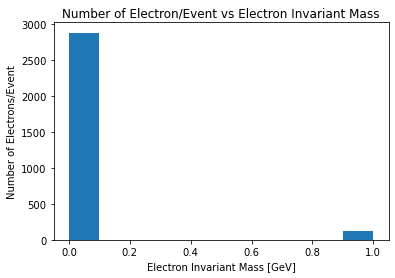

In [108]:
hlt_EM7probe = branches['HLT_e9_lhtight_e4_etcut_probe_1invmAB5_L1JPSI_1M5_EM7']


plt.hist(hlt_EM7probe)
plt.title('Number of Electron/Event vs Electron Invariant Mass')
plt.xlabel('Electron Invariant Mass [GeV]')
plt.ylabel('Number of Electrons/Event')

Text(0, 0.5, 'Counts')

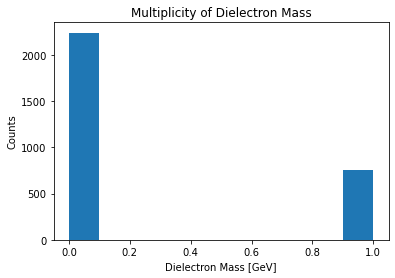

In [109]:
plt.hist(ak.count(l1eemass,axis=1))
plt.title('Multiplicity of Dielectron Mass')
plt.xlabel('Dielectron Mass [GeV]')
plt.ylabel('Counts')

In [110]:
#Acessing one of the variables with eemass

eemass = branches2['eemass']

print(ak.sum(eemass))
print(ak.count(eemass))
print(ak.num(eemass))

2085471100.0
193299
[0, 1, 10, 36, 28, 0, 1, 1, 1, 1, 0, ... 10, 66, 28, 10, 1, 6, 21, 6, 28, 190, 1431]


Text(0, 0.5, 'Counts')

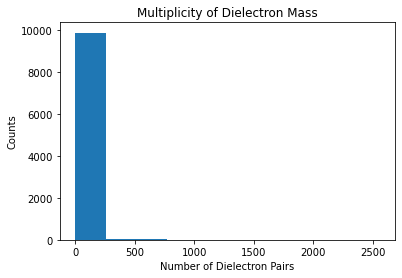

In [111]:
plt.hist(ak.num(eemass))
plt.title('Multiplicity of Dielectron Mass')
plt.xlabel('Number of Dielectron Pairs')
plt.ylabel('Counts')

2003.91357421875 

2876.401611328125 

2092.01318359375 

2988.604736328125 

2283.621826171875 

3443.890869140625 

1918.75 

4072.4765625 

2788.8583984375 

3367.0712890625 

3593.01171875 

2906.70556640625 

2700.528564453125 

2842.7998046875 

2027.43798828125 

3821.22509765625 

2224.7392578125 

2871.447998046875 

2625.384033203125 

1860.2677001953125 

3027.9677734375 



Text(0, 0.5, 'Counts/Event')

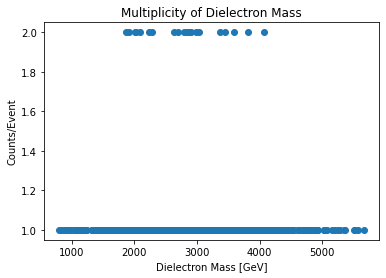

In [112]:
#Plotting multiplicity of l1eemass

Dict = {}

for x in l1eemass:
    
    if len(x) == 0:
        continue
        
    mass = x[0]
    
    if mass not in Dict.keys():
        Dict[mass] = 1
    else:
        Dict[mass] += 1
        print(mass,'\n')

masses = Dict.keys()
counts = Dict.values()

plt.scatter(masses,counts)
plt.title('Multiplicity of Dielectron Mass')
plt.xlabel('Dielectron Mass [GeV]')
plt.ylabel('Counts/Event')

**<h3>Other Distributions</h3>**

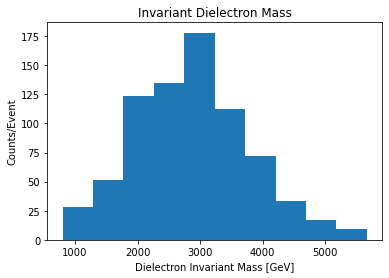

In [113]:
plt.hist([ak.flatten(l1eemass)])
plt.title('Invariant Dielectron Mass')
plt.xlabel('Dielectron Invariant Mass [GeV]')
plt.ylabel('Counts/Event')
plt.show()

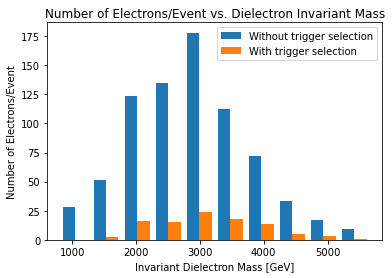

In [114]:
#Plotting l1eemass with and without a trigger selection

plt.hist([ak.flatten(l1eemass), ak.flatten(l1eemass[hlt_EM7probe_mask])], label=['Without trigger selection','With trigger selection'])
plt.title('Number of Electrons/Event vs. Dielectron Invariant Mass')
plt.xlabel('Invariant Dielectron Mass [GeV]')
plt.ylabel('Number of Electrons/Event')
plt.legend(loc='best')
plt.show()

**Plotting other trigger selections**

In [115]:
#Acessing one of the variables with delta(R)

l1eedr = branches['l1eedR']

l1eedr

<Array [[], [], [0.441], ... [], [0.359], []] type='3000 * var * float32'>

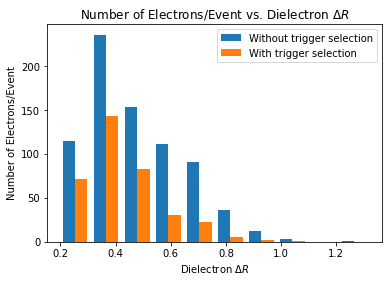

In [116]:
#Plotting l1eedr with and without a trigger selection

plt.hist([ak.flatten(l1eedr), ak.flatten(l1eedr[l1_EM8VH_mask])], label=['Without trigger selection','With trigger selection'])
plt.title('Number of Electrons/Event vs. Dielectron $\Delta R$')
plt.xlabel('Dielectron $\Delta R$')
plt.ylabel('Number of Electrons/Event')
plt.legend(loc='best')
plt.show()

In [117]:
l1_muon_mask = branches['l1muons_n'] == 1

np.sum(l1_muon_mask) #Number of events is 250

227

In [118]:
true_eemass = branches['true_eemass']

true_eemass

<Array [[4.59], [3.96e+03, ... [245]] type='3000 * var * float32'>

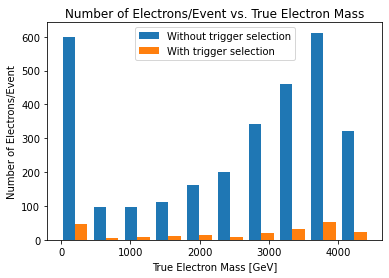

In [119]:
#Plotting true_eemass with and without a trigger selection

plt.hist([ak.flatten(true_eemass), ak.flatten(true_eemass[l1_muon_mask])], label=['Without trigger selection','With trigger selection'])
plt.title('Number of Electrons/Event vs. True Electron Mass')
plt.xlabel('True Electron Mass [GeV]')
plt.ylabel('Number of Electrons/Event')
plt.legend(loc='best')
plt.show()

In [120]:
#Accessing branches with TLorentz vectors

truedielectrons = branches['truedielectrons']
trueB = branches['trueB']

trueB

<Array [[{fP: {fX: 1.43e+04, ... fE: 2.8e+04}]] type='3000 * var * TLorentzVecto...'>

In [121]:
#Obtaining properties about the second dielectron particle: momentum (P) with cartesian coordinates and energy (E)

truedielectrons.tolist()[3]

[{'fP': {'fX': 7018.90966796875,
   'fY': -11312.52880859375,
   'fZ': -30979.001953125},
  'fE': 33718.6064453125}]

In [122]:
#Obtaining properties about the second B-hadron particle: momentum (P) with cartesian coordinates and energy (E)

trueB.tolist()[3]

[{'fP': {'fX': 6532.5087890625,
   'fY': -11869.716796875,
   'fZ': -32762.677734375},
  'fE': 35844.5390625}]

**What are TLorentz Vectors?** </br>
TLorentz Vector is a general 4-vector class in ROOT, that can be used for the description of position and time (X, Y, Z, t) or momentum and energy (px, py, pz, E).

### **Efficiency of ee mass**

In [123]:
#Reading the file again using ROOT

myfile = ROOT.TFile.Open('/eos/user/h/hrussell/Bphys_Data/mc20.300590.Bd_Kstar_Kpi_e4e4.test1.root')

mytree = myfile.Get("trig")
mytree.GetEntries()

3000

**</h3>L1 Dielectron Mass (l1eemass)</h3>**

In [124]:
c1 = ROOT.TCanvas('c1','c1',800,600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [125]:
#all_l1eemass is the simulated and pass_l1eemass is the actual passed

#Make sure they both have the same number of bins for CheckConsistency to work

hist_l1eemass = ROOT.TH1D('hist_l1eemass','hist_l1eemass',100,0,6000)
all_l1eemass  = ROOT.TH1D("all_l1eemass","all_l1eemass",100,0,6000)
pass_l1eemass = ROOT.TH1D("pass_l1eemass","pass_l1eemass",100,0,6000)

#Use .Sumw2() to show error bars

all_l1eemass.Sumw2()
pass_l1eemass.Sumw2()

#Filling the histograms by looping through the events in mytree and seeing if they pass a certain criteria

for entry in mytree:
    if len(mytree.l1eemass) == 1:
        hist_l1eemass.Fill(mytree.l1eemass[0])
    if len(mytree.true_eemass) == 1:
        all_l1eemass.Fill(mytree.true_eemass[0])
        if len(mytree.l1eemass) == 1:
            pass_l1eemass.Fill(mytree.true_eemass[0])            
        
#hist_l1eemass.Scale(1./hist_l1eemass.GetMaximum())

In [126]:
hist_l1eemass.SetFillColor(ROOT.kGray)
hist_l1eemass.SetLineColor(ROOT.kGray)
all_l1eemass.SetLineColor(ROOT.kRed)

In [127]:
hist_l1eemass.Draw()
c1.Draw()
all_l1eemass.Draw('same')
c1.Draw()
pass_l1eemass.Draw('same')
c1.Draw()

The above **for loop** describes the following: </br>

1. If the length of an event in true_eemass is exactly 1, then fill the all_l1eemass histogram with that value </br>

2. If the length of an event in l1eemass is exactly 1 given the first criteria, then fill the pass_l1eemass histogram with that value

**</h3>HLT ee Mass (correct method - denominator should be the grey area)</h3>**

_Things to do:_</br>
1. Grey area: denominator = all events with a true dielectron pair </br>
    a. Show dielectron mass </br>
2. Create the numerator which is the passed events of each HLT trigger </br>
3. Overlay the efficiency of each HLT trigger by dividing the numerator by denominator

In [128]:
c3 = ROOT.TCanvas('c3','c3',800,600)

hist_den = ROOT.TH1D('hist_den','hist_den',50,0,5000)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


In [129]:
hist_hltnoprobe = ROOT.TH1D('hist_hltnoprobe','hist_hltnoprobe',50,0,5000)

hist_hltprobe = ROOT.TH1D('hist_hltprobe','hist_hltprobe',50,0,5000)

hist_hltnoprobe.Sumw2()
hist_hltprobe.Sumw2()

In [130]:
for ievt, entry in enumerate(mytree):
    if ievt %100 == 0:
        print (ievt / mytree.GetEntries() * 100., "% complete")
    if len(mytree.truedielectrons) >= 1 and len(mytree.true_eemass) == 1 and mytree.true_eemass[0] > 50:
        hist_den.Fill(mytree.true_eemass[0])
        if mytree.L1_2eEM15L == 1:
            hist_hltnoprobe.Fill(mytree.true_eemass[0])
        if mytree.L1_2EM15==1:
            hist_hltprobe.Fill(mytree.true_eemass[0])

0.0 % complete
3.3333333333333335 % complete
6.666666666666667 % complete
10.0 % complete
13.333333333333334 % complete
16.666666666666664 % complete
20.0 % complete
23.333333333333332 % complete
26.666666666666668 % complete
30.0 % complete
33.33333333333333 % complete
36.666666666666664 % complete
40.0 % complete
43.333333333333336 % complete
46.666666666666664 % complete
50.0 % complete
53.333333333333336 % complete
56.666666666666664 % complete
60.0 % complete
63.33333333333333 % complete
66.66666666666666 % complete
70.0 % complete
73.33333333333333 % complete
76.66666666666667 % complete
80.0 % complete
83.33333333333334 % complete
86.66666666666667 % complete
90.0 % complete
93.33333333333333 % complete
96.66666666666667 % complete


-> Using HLT trigger without probe <-

In [131]:
hltnoprobe_eff = ROOT.TEfficiency(hist_hltnoprobe,hist_den)

#Creating a cloned version of the hist_den histogram for better scaling

hist_den_forplot = hist_den.Clone("histden_forplot")

#Cloning is useful if we wanted to change the clone histogram without changing the original one

hist_den_forplot.Scale(1./hist_den_forplot.GetMaximum())

-> Using HLT trigger with probe <-

In [132]:
hltprobe_eff = ROOT.TEfficiency(hist_hltprobe,hist_den)

-> Combining both HLTs and showing efficiency <-

In [133]:
hist_den_forplot.SetFillColor(ROOT.kGray)
hist_den_forplot.SetFillStyle(4050)
hist_den_forplot.SetLineColor(ROOT.kGray)
hltnoprobe_eff.SetLineColor(ROOT.kRed)

In [134]:
#Use hist_name.Scale when trying to scale the histogram by a specific constant
#Call Sumw2() before using this due to the scaling of the error bars as well
#This also normalizes the histogram so that the bins integral is equal to the normalization parameter

hist_den_forplot.Scale(0.1)

In [135]:
#Use .Draw('hist') to fill the histogram with a histgoram shape/fill

hist_den_forplot.Draw('hist')

#Set more reasonable bounds for histograms to be meaningful

hist_den_forplot.GetXaxis().SetRangeUser(0,4500)
hist_den_forplot.SetMinimum(0)
hist_den_forplot.SetMaximum(1.0)

c3.Draw()
hltnoprobe_eff.Draw('same')
hltprobe_eff.Draw('same')
c3.Draw()

**</h3>Using Histograms in ROOT for Other Operations</h3>**

In [136]:
#Filling histogram with a TLorentz object (example)

true_Bpt = ROOT.TH1D("true_Bpt","true_Bpt",50,6000,50000)

In [137]:
#Another way of filling a histogram in ROOT is using >>
#Can be a bit tricky when you have more than one condition so use carefully

mytree.Draw("trueB.Pt() >> true_Bpt","")

3000

In [138]:
true_Bpt.Draw()
c3.Draw()

In [139]:
#Displaying the difference between the true_ept1 and true_ept2

true_ept_diff = ROOT.TH1D("true_ept_diff","",100,-10,100)

mytree.Draw("true_ept1-true_ept2 >> true_ept_diff","")

3000

In [140]:
true_ept_diff.SetFillColor(ROOT.kGray)
true_ept_diff.SetLineColor(ROOT.kGray)

In [141]:
true_ept_diff.Draw()
c3.Draw()

l1_2EM15 efficiency vs true_ept2

In [142]:
c4 = ROOT.TCanvas('c4','c4',800,600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


In [143]:
#Printing items in mytree that start with the name "true"

mytree.Print("true*")

******************************************************************************
*Tree    :trig      : trig                                                   *
*Entries :     3000 : Total =       128804256 bytes  File  Size =   31084688 *
*        :          : Tree compression factor =   4.14                       *
******************************************************************************
*Br    0 :trueB     : vector<TLorentzVector>                                 *
*Entries :     3000 : Total  Size=     235245 bytes  File Size  =      76409 *
*Baskets :        9 : Basket Size=     812032 bytes  Compression=   3.07     *
*............................................................................*
*Br    1 :trueKstar : vector<TLorentzVector>                                 *
*Entries :     3000 : Total  Size=      42769 bytes  File Size  =       4918 *
*Baskets :        3 : Basket Size=     164352 bytes  Compression=   8.59     *
*...................................................

In [144]:
#Use fewer number of bins for the histograms to show error bars more clearly (i.e. 20 or 10 instead of 100)

l1_den = ROOT.TH1D('deno','deno',10,0,20000)

l1_num = ROOT.TH1D('nume','nume',10,0,20000)

#Use a cut on the true ee mass that shows masses > 50 for better display of results

for entry in mytree:
    if len(mytree.true_ept2) >= 1 and mytree.true_eemass[0] > 50:
        l1_den.Fill(mytree.true_ept2[0])
        if mytree.L1_2EM15 == 1:
            l1_num.Fill(mytree.true_ept2[0])

In [145]:
l1_den.Draw()
l1_num.Draw('same')
c4.Draw()

In [146]:
l1old_eff = ROOT.TEfficiency(l1_num,l1_den)

In [147]:
l1old_eff.Draw()
c4.Draw()

l1_2eEM15L efficiency and l1_2eEM15M efficiency vs true_ept2

In [148]:
l1e15l_den = ROOT.TH1D('denoe15l','denoe15l',10,0,20000)

l1e15l_num = ROOT.TH1D('numee15l','numee15l',10,0,20000)

for entry in mytree:
    if len(mytree.true_ept2) >= 1 and mytree.true_eemass[0] > 50:
        l1e15l_den.Fill(mytree.true_ept2[0])
        if mytree.L1_2eEM15L == 1:
            l1e15l_num.Fill(mytree.true_ept2[0])

In [149]:
l1e15l_den.Draw()
l1e15l_num.Draw('same')
c4.Draw()

In [150]:
l1newl_eff = ROOT.TEfficiency(l1e15l_num,l1e15l_den)

In [151]:
l1newl_eff.Draw()
c4.Draw()

In [152]:
l1e15m_den = ROOT.TH1D('denoe15m','denoe15m',10,0,20000)

l1e15m_num = ROOT.TH1D('numee15m','numee15m',10,0,20000)

for entry in mytree:
    if len(mytree.true_ept2) >= 1 and mytree.true_eemass[0] > 50:
        l1e15m_den.Fill(mytree.true_ept2[0])
        if mytree.L1_2eEM15M == 1:
            l1e15m_num.Fill(mytree.true_ept2[0])

In [153]:
l1e15m_den.Draw()
l1e15m_num.Draw('same')
c4.Draw()

In [154]:
l1newm_eff = ROOT.TEfficiency(l1e15m_num,l1e15m_den)

In [155]:
l1newm_eff.Draw()
c4.Draw()

l1_em15 efficiency vs true_ept1

In [156]:
l1e15_den = ROOT.TH1D('deno15','deno15',10,0,20000)

l1e15_num = ROOT.TH1D('nume15','nume15',10,0,20000)

for entry in mytree:
    if len(mytree.true_ept1) >= 1 and mytree.true_eemass[0] > 50:
        l1e15_den.Fill(mytree.true_ept1[0])
        if mytree.L1_EM15 == 1:
            l1e15_num.Fill(mytree.true_ept1[0])

In [157]:
l1e15_den.Draw()
l1e15_num.Draw('same')
c4.Draw()

In [158]:
l1e15_eff = ROOT.TEfficiency(l1e15_num,l1e15_den)

In [159]:
l1e15_eff.Draw()
c4.Draw()

l1_eEM12 efficiency vs true_ept1

In [160]:
l1ee12_den = ROOT.TH1D('deno12','deno12',10,0,20000)

l1ee12_num = ROOT.TH1D('nume12','nume12',10,0,20000)


for entry in mytree:
    if len(mytree.true_ept1) >= 1 and mytree.true_eemass[0] > 50:
        l1ee12_den.Fill(mytree.true_ept1[0])
        if mytree.L1_eEM12 == 1:
            l1ee12_num.Fill(mytree.true_ept1[0])

In [161]:
l1ee12_den.Draw()
l1ee12_num.Draw('same')
c4.Draw()

In [162]:
l1ee12_eff = ROOT.TEfficiency(l1ee12_num,l1ee12_den)

In [163]:
l1ee12_eff.Draw()
c4.Draw()

l1_EM7 and l1_eEM7 efficiencies vs true_ept1

In [164]:
l1ee7_den = ROOT.TH1D('deno77','deno77',10,0,20000)

l1ee7_num = ROOT.TH1D('nume77','nume77',10,0,20000)

for entry in mytree:
    if len(mytree.true_ept1) >= 1 and mytree.true_eemass[0] > 50:
        l1ee7_den.Fill(mytree.true_ept1[0])
        if mytree.L1_eEM7 == 1:
            l1ee7_num.Fill(mytree.true_ept1[0])

In [165]:
l1ee7_eff = ROOT.TEfficiency(l1ee7_num,l1ee7_den)

In [166]:
l1e7_den = ROOT.TH1D('deno7','deno7',10,0,20000)

l1e7_num = ROOT.TH1D('nume7','nume7',10,0,20000)

for entry in mytree:
    if len(mytree.true_ept1) >= 1 and mytree.true_eemass[0] > 50:
        l1e7_den.Fill(mytree.true_ept1[0])
        if mytree.L1_EM7 == 1:
            l1e7_num.Fill(mytree.true_ept1[0])

In [167]:
l1e7_den.Draw()
l1e7_num.Draw('same')
c4.Draw()

In [168]:
l1e7_eff = ROOT.TEfficiency(l1e7_num,l1e7_den)

In [169]:
l1ee7_eff.SetLineColor(ROOT.kRed)

l1e7_eff.Draw()
l1ee7_eff.Draw('same')
c4.Draw()

l1_EM20VH efficiency vs. true_ept1

In [170]:
l120vh_den = ROOT.TH1D('l120vh_den','l120vh_den',10,0,20000)
l120vh_num = ROOT.TH1D('l120vh_num','l120vh_num',10,0,20000)

for entry in mytree:
    if len(mytree.true_ept1) >= 1 and mytree.true_eemass[0] > 50:
        l120vh_den.Fill(mytree.true_ept1[0])
        if mytree.L1_EM20VH == 1:
            l120vh_num.Fill(mytree.true_ept1[0])

In [171]:
l120vh_den.Draw()
l120vh_num.Draw('same')
c4.Draw()

In [172]:
l120vh_eff = ROOT.TEfficiency(l120vh_num,l120vh_den)

In [173]:
l120vh_eff.Draw()
c4.Draw()

l1_eEM5 trigger per x-axis bin and efficiency is y-axis

In [174]:

l1e5_den = ROOT.TH1D('l1e5_den','l1e5_den',10,0,20000)
l1e5_num = ROOT.TH1D('l1e5_num','l1e5_num',10,0,20000)

for entry in mytree:
    if len(mytree.true_ept1) >= 1 and mytree.true_eemass[0] > 50:
        l1e5_den.Fill(mytree.true_ept1[0])
        if mytree.L1_eEM5 == 1:
            l1e5_num.Fill(mytree.true_ept1[0])

In [175]:
l1e5new_eff = ROOT.TEfficiency(l1e5_num,l1e5_den)

In [176]:
l1e5_den.Draw()
l1e5_num.Draw('same')
c4.Draw()

In [177]:
l1e5new_eff.Draw()
c4.Draw()

l1_eEM7 and l1_EM7 effiiciency with legend

In [178]:
l1e7_od = ROOT.TH1D('l1e7_od','l1e7_od',10,0,20000)
l1e7_on = ROOT.TH1D('l1e7_on','l1e7_on',10,0,20000)

for entry in mytree:
    if len(mytree.true_ept1) >= 1 and mytree.true_eemass[0] > 50:
        l1e7_od.Fill(mytree.true_ept1[0])
        if mytree.L1_EM7 == 1:
            l1e7_on.Fill(mytree.true_ept1[0])
            
l1e7_nd = ROOT.TH1D('l1e7_nd','l1e7_nd',10,0,20000)
l1e7_nn = ROOT.TH1D('l1e7_nn','l1e7_nn',10,0,20000)

for entry in mytree:
    if len(mytree.true_ept1) >= 1 and mytree.true_eemass[0] > 50:
        l1e7_nd.Fill(mytree.true_ept1[0])
        if mytree.L1_eEM7 == 1:
            l1e7_nn.Fill(mytree.true_ept1[0])

In [179]:
l1e7o_eff = ROOT.TEfficiency(l1e7_on,l1e7_od)

l1e7n_eff = ROOT.TEfficiency(l1e7_nn,l1e7_nd)

In [180]:
l1e7o_eff.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend()
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.AddEntry(l1e7o_eff,"L1_EM7","l")
leg.AddEntry(l1e7n_eff,"L1_eEM7","l")

In [181]:
l1e7o_eff.Draw()
l1e7n_eff.Draw('same')
leg.Draw()
c4.Draw()

Reconstructed electrons with L1_EM12 and L1_eEM12, and L1_2EM3 efficiencies

In [182]:
l1_EM12_den = ROOT.TH1D('l1_EM12_den','l1_EM12_den',10,2000,20000)
l1_EM12_num = ROOT.TH1D('l1_EM12_num','l1_EM12_num',10,2000,20000)

for entry in mytree:
    if len(mytree.recoelectrons) >= 1 and mytree.true_eemass[0] > 50:
        l1_EM12_den.Fill(mytree.recoelectrons[0].Pt())
        if mytree.L1_EM12 == 1:
            l1_EM12_num.Fill(mytree.recoelectrons[0].Pt())
            
l1_eEM12_den = ROOT.TH1D('L1_eEM12_den','L1_eEM12_den',10,2000,20000)
l1_eEM12_num = ROOT.TH1D('L1_eEM12_num','L1_eEM12_num',10,2000,20000)

for entry in mytree:
    if len(mytree.recoelectrons) >= 1 and mytree.true_eemass[0] > 50:
        l1_eEM12_den.Fill(mytree.recoelectrons[0].Pt())
        if mytree.L1_eEM12 == 1:
            l1_eEM12_num.Fill(mytree.recoelectrons[0].Pt())
            
l1_2EM3_den = ROOT.TH1D('l1_2EM3_den','l1_2EM3_den',10,2000,20000)
l1_2EM3_num = ROOT.TH1D('l1_2EM3_num','l1_2EM3_num',10,2000,20000)

for entry in mytree:
    if len(mytree.recoelectrons) >= 1 and mytree.true_eemass[0] > 50:
        l1_2EM3_den.Fill(mytree.recoelectrons[0].Pt())
        if mytree.L1_2EM3 == 1:
            l1_2EM3_num.Fill(mytree.recoelectrons[0].Pt())

In [183]:
mytree.Draw("recoelectrons.Pt() >> l1_EM12_den","")

l1_EM12_den.Draw()
c4.Draw()

In [184]:
l1_EM12_eff  = ROOT.TEfficiency(l1_EM12_num,l1_EM12_den)

l1_eEM12_eff = ROOT.TEfficiency(l1_eEM12_num,l1_eEM12_den)

l1_2EM3_eff  = ROOT.TEfficiency(l1_2EM3_num,l1_2EM3_den)

In [185]:
l1_EM12_den.Draw()
l1_EM12_num.Draw('same')
c4.Draw()

In [186]:
l1_EM12_eff.SetLineColor(ROOT.kRed)

l1_2EM3_eff.Draw()
l1_EM12_eff.Draw('same')
l1_eEM12_eff.Draw('same')
c4.Draw()